In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.font_manager as fm
from datetime import datetime, timedelta
from scipy.optimize import curve_fit
import random
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from deap import base, creator, tools, algorithms
import re

In [2]:
#千千数模 q群：947622850

In [3]:
# 设置全局字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False 

# 加载字体文件
font = fm.FontProperties(fname='C:\Windows\Fonts\simhei.ttf', size=16)

In [4]:
merged_data = pd.read_csv('merged_data.csv')
merged_data['销售日期'] = pd.to_datetime(merged_data['销售日期'])

In [5]:
merged_data.head()

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),平均损耗率
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,0.743,5.0,销售,否,3.0,12.83
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,0.502,5.0,销售,否,3.0,12.83
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,0.301,5.0,销售,否,3.0,12.83
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,0.382,5.0,销售,否,3.0,12.83
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,0.261,5.0,销售,否,3.0,12.83


In [6]:
# get the start and end dates of the last week
end_date = merged_data['销售日期'].max()
start_date = end_date - pd.Timedelta(days=6)

# filter the dataframe to only include the rows within the last week
last_week_data = merged_data.loc[(merged_data['销售日期'] >= start_date) & (merged_data['销售日期'] <= end_date)]

# count the number of occurrences of each item in the last week
item_counts = last_week_data['单品名称'].value_counts()

# print the resulting counts
print(item_counts)

单品名称
芜湖青椒(1)         272
云南生菜(份)         226
竹叶菜             215
西兰花             199
西峡花菇(1)         176
小米椒(份)          150
云南油麦菜(份)        149
紫茄子(2)          141
螺丝椒             127
苋菜              120
金针菇(盒)          113
木耳菜             106
奶白菜             100
净藕(1)            90
小青菜(1)           90
红薯尖              81
螺丝椒(份)           79
小皱皮(份)           79
洪湖藕带             77
娃娃菜              73
长线茄              73
双孢菇(盒)           70
上海青              66
红椒(2)            65
海鲜菇(包)           62
高瓜(1)            57
枝江青梗散花           51
姜蒜小米椒组合装(小份)     49
菠菜(份)            49
云南生菜             36
青茄子(1)           31
七彩椒(2)           30
菱角               23
高瓜(2)            23
菜心               20
红莲藕带             18
菠菜               17
虫草花(份)           16
青红杭椒组合装(份)       15
外地茼蒿             14
云南油麦菜            13
圆茄子(2)           12
蟹味菇与白玉菇双拼(盒)      8
野生粉藕              6
白玉菇(袋)            4
鲜木耳(份)            4
木耳菜(份)            3
青线椒(份)            2
紫茄子(1)            2
Name: count, dt

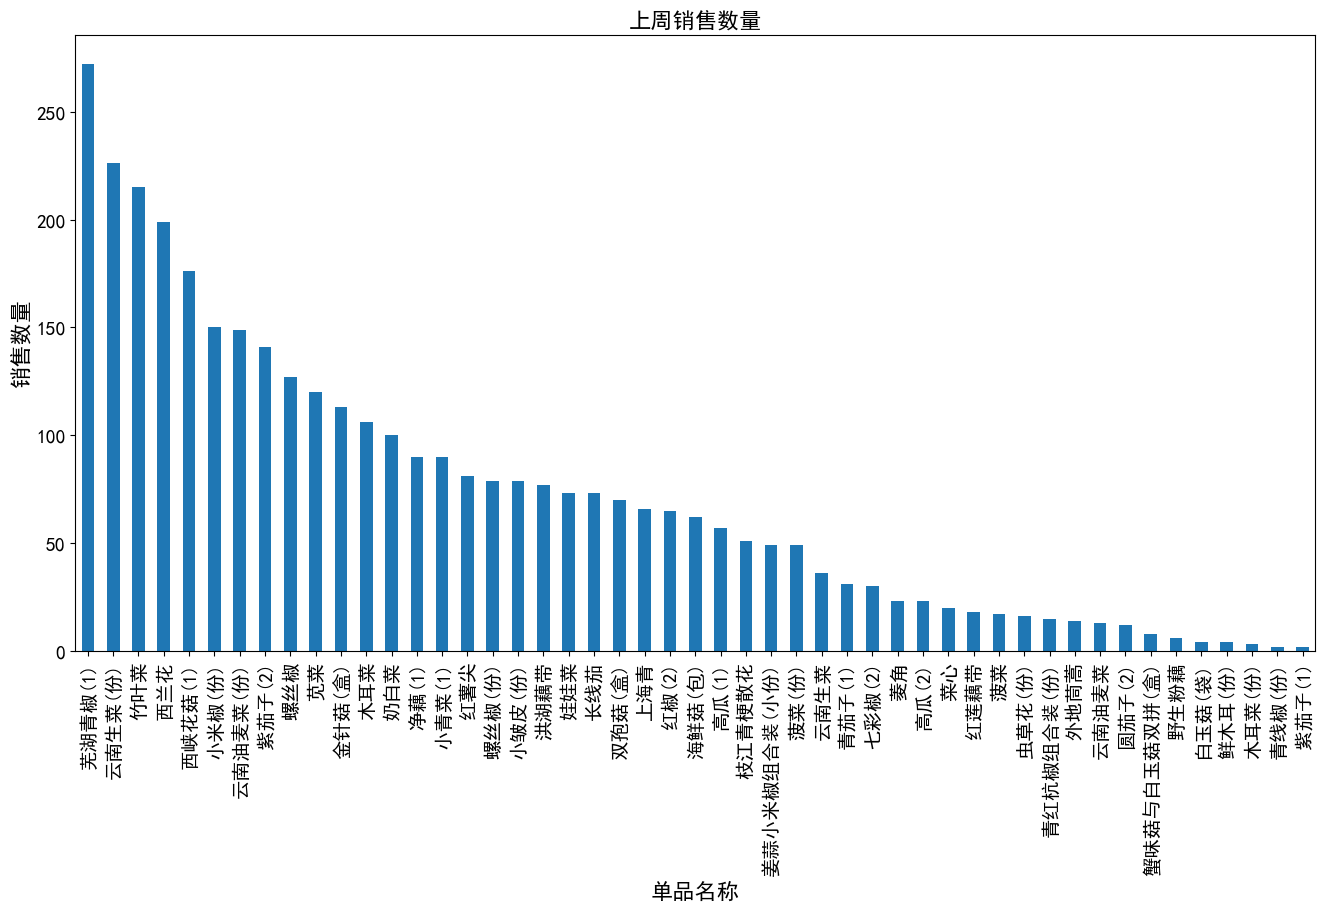

In [7]:
plt.figure(figsize=(16, 8))
last_week_data['单品名称'].value_counts().plot(kind='bar', figsize=(16, 8), fontsize=14)
plt.xlabel('单品名称', fontproperties=font)
plt.ylabel('销售数量', fontproperties=font)
plt.title('上周销售数量', fontproperties=font)
plt.savefig('上周销售数量.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
daily_item_sales = last_week_data.groupby(['销售日期', '单品名称']).size().reset_index(name='销售数量')
daily_item_sales = pd.merge(daily_item_sales, merged_data[['销售日期', '单品名称', '销售单价(元/千克)', '批发价格(元/千克)', '平均损耗率','分类名称']], on=['销售日期', '单品名称'], how='left')

In [9]:
last_week_data

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),平均损耗率
15413,102900005115762,苋菜,1011010101,花叶类,2023-06-24,09:13:51.795,0.505,4.0,销售,否,2.31,12.83
15414,102900005115762,苋菜,1011010101,花叶类,2023-06-24,09:14:43.77,0.505,4.0,销售,否,2.31,12.83
15415,102900005115762,苋菜,1011010101,花叶类,2023-06-24,09:28:18.358,1.061,4.0,销售,否,2.31,12.83
15416,102900005115762,苋菜,1011010101,花叶类,2023-06-24,09:40:58.014,0.505,4.0,销售,否,2.31,12.83
15417,102900005115762,苋菜,1011010101,花叶类,2023-06-24,09:43:49.201,0.606,4.0,销售,否,2.31,12.83
...,...,...,...,...,...,...,...,...,...,...,...,...
876612,106971533450003,海鲜菇(包),1011010801,食用菌,2023-06-30,18:09:09.212,1.000,3.0,销售,否,1.95,9.45
876613,106971533450003,海鲜菇(包),1011010801,食用菌,2023-06-30,18:42:48.186,1.000,3.0,销售,否,1.95,9.45
876614,106971533450003,海鲜菇(包),1011010801,食用菌,2023-06-30,21:04:16.805,1.000,1.8,销售,是,1.95,9.45
876615,106971533450003,海鲜菇(包),1011010801,食用菌,2023-06-30,21:12:21.748,1.000,1.8,销售,是,1.95,9.45


In [10]:
# 将每个单品的上周的平均值作为未来一天的预测值
daily_item_sales['预测需求'] = daily_item_sales.groupby('单品名称')['销售数量'].transform('mean')
daily_item_sales['批发价格'] = daily_item_sales.groupby('单品名称')['批发价格(元/千克)'].transform('mean')
daily_item_sales['销售单价(元/千克)'] = daily_item_sales.groupby('单品名称')['销售单价(元/千克)'].transform('mean')
# 存储到新的dataframe中
daily_item_sales_predict = daily_item_sales[['销售日期', '单品名称', '预测需求','批发价格','平均损耗率','分类名称','销售单价(元/千克)']]
daily_item_sales_predict['销售日期'] = '2023-07-01'
# 去重
daily_item_sales_predict = daily_item_sales_predict.drop_duplicates()

In [11]:
daily_item_sales_predict.head()

,销售日期,单品名称,预测需求,批发价格,平均损耗率,分类名称,销售单价(元/千克)
0,2023-07-01,七彩椒(2),6.133333,12.274667,9.24,辣椒类,18.986667
5,2023-07-01,上海青,11.969697,4.131970,12.83,花叶类,8.000000
18,2023-07-01,云南油麦菜(份),22.140940,2.869530,12.83,花叶类,4.159060
44,2023-07-01,云南生菜(份),39.327434,3.575796,12.83,花叶类,4.461504
102,2023-07-01,净藕(1),13.422222,10.734000,13.65,水生根茎类,14.400000


# 3 定义规划模型，求解单品的进货量和定价策略，使得商超利益最大化，并能够尽可能满足品类需求

In [63]:
S_profit = 0
purchase_strategy = []
sales_price = []
for i in range(0,3000000):
    # 初始化列表
    lst = [0] * 49

    # 随机选择元素
    while sum(lst) < 27 or sum(lst) > 33:
        lst = [random.randint(0, 1) for _ in range(49)]
    num_lst = np.multiply( np.array(lst) , np.array([random.uniform(2.5, 30) for _ in range(49)])) #进货量
    cost_lst = np.multiply( np.array(lst) , np.array(daily_item_sales_predict['平均损耗率'])) / 100 #损耗量

    # 将lst转换为布尔列表
    bool_lst = [bool(x) for x in lst]
    # 使用布尔索引筛选DataFrame
    filtered_df = daily_item_sales_predict[bool_lst]
    num_veg = len(filtered_df['分类名称'].unique())
    num_veg_1 = len(filtered_df['单品名称'].unique())

    cost_num_lst = np.multiply( num_lst, cost_lst) #损耗量
    max_sale_lst = num_lst - cost_num_lst #最大销售量

    p_lst = np.multiply( num_lst, np.array(daily_item_sales_predict['批发价格'])) #进货价格
    price_lst = np.multiply( np.array(lst) , np.array(daily_item_sales_predict['销售单价(元/千克)'])) #销售价格
    sale_lst =  np.multiply( np.array(lst) , np.array(daily_item_sales_predict['预测需求'])) #销售量
    actually_sale = np.where(max_sale_lst- sale_lst < 0, max_sale_lst , max_sale_lst- sale_lst )

    profit_lst = np.multiply( actually_sale , price_lst) - p_lst #利润
    s_profit = sum(profit_lst) + 5 * num_veg + num_veg_1 #总利润
    if s_profit > S_profit:
        S_profit = s_profit
        purchase_strategy = num_lst.tolist()
        sales_price = price_lst.tolist()
        S_profit = s_profit

In [62]:
# 结构化存储purchase_strategy和sales_price
purchase_strategy_df = pd.DataFrame()
print(purchase_strategy)
print(sales_price)



data = list(zip(daily_item_sales_predict['单品名称'],purchase_strategy, sales_price))
purchase_strategy_df = pd.DataFrame(data, columns=['单品名称','进货量', '销售价格']) 
# purchase_strategy_df['进货量'] = pd.DataFrame(purchase_strategy, columns=['进货量'])['进货量']
# sales_price_df = pd.DataFrame(sales_price, columns=['销售价格'])
# purchase_strategy_df['销售价格'] = sales_price_df['销售价格']
purchase_strategy_df

[28.973901199915517, 0.0, 11.670215006926973, 24.522349298157266, 0.0, 7.944754723953603, 10.267196879945338, 0.0, 28.52921967142075, 0.0, 0.0, 6.6901980474743885, 15.179389107605338, 0.0, 0.0, 15.3659379380849, 0.0, 0.0, 29.96295105765485, 0.0, 0.0, 9.89174128527606, 0.0, 27.61447780241629, 21.53116821480775, 0.0, 5.73458702883393, 0.0, 22.107622748219327, 23.428896997009748, 11.925224855600495, 0.0, 0.0, 0.0, 27.110909669553447, 0.0, 12.069991261222425, 21.034066454421943, 5.776017295621831, 0.0, 0.0, 24.5175521203826, 5.221918764533079, 0.0, 5.237433129344182, 17.088151534822362, 9.798908128532524, 19.45516562941656, 29.162458976500492]
[18.986666666666668, 0.0, 4.159060402684564, 4.461504424778761, 0.0, 5.03, 6.133333333333333, 0.0, 4.792, 0.0, 0.0, 2.586075949367088, 5.769333333333333, 0.0, 0.0, 12.799999999999999, 0.0, 0.0, 3.773953488372093, 0.0, 0.0, 9.2, 0.0, 5.2, 3.805, 0.0, 14.0, 0.0, 14.0, 3.6125, 11.291338582677165, 0.0, 0.0, 0.0, 24.0, 0.0, 12.0, 5.493333333333333, 4.3, 0

,单品名称,进货量,销售价格
0,七彩椒(2),28.973901,18.986667
1,上海青,0.000000,0.000000
2,云南油麦菜(份),11.670215,4.159060
3,云南生菜(份),24.522349,4.461504
4,净藕(1),0.000000,0.000000
5,双孢菇(盒),7.944755,5.030000
6,圆茄子(2),10.267197,6.133333
7,外地茼蒿,0.000000,0.000000
8,奶白菜,28.529220,4.792000
9,姜蒜小米椒组合装(小份),0.000000,0.000000


In [14]:
purchase_strategy_df.to_csv('plan_result_problem3.csv', index=False)